# Importer les librairies usuelles

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

# Lecture du dataset

In [159]:
df = pd.read_csv('data/SPAM text message 20170820 - Data.csv')
df = df.rename(columns={"Category": "label", "Message": "sms"})

# Explorer et visualiser les données

In [160]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [162]:
df.describe()

,label,sms
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [163]:
df['len'] = df['sms'].apply(len)

<Figure size 1080x576 with 0 Axes>

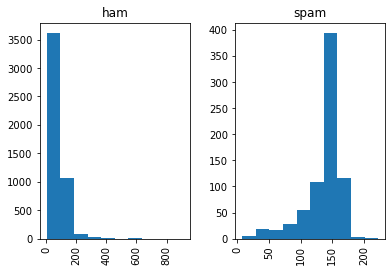

In [164]:
plt.figure(figsize=(15, 8))
df.hist(column='len', by='label')
plt.show()

In [165]:
print('Ham :')
print(df[df.label=='ham'].count())
print()
print('Spam :')
print(df[df.label=='spam'].count())

Ham :
label    4825
sms      4825
len      4825
dtype: int64

Spam :
label    747
sms      747
len      747
dtype: int64


In [166]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
stemmer = PorterStemmer()

# Fonction de traitement initiale du text

# Tokenize, Stemming

In [167]:
import string

def text_process(mess):
    first = [char for char in mess if char not in string.punctuation]
    second = ''.join(first)
    third = word_tokenize(second)
    fourth = [word for word in third if word not in stopwords.words('english')]
    return fourth

# Utilisation d'une des methode machine learning afin d'approcher les données

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [169]:
X = df['sms']
y = df['label']

In [170]:
cv = CountVectorizer(analyzer=text_process)
X = cv.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [177]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Estimer la precision du model 

In [178]:
pred = clf.predict(X_test)

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1454
        spam       0.83      0.96      0.89       218

    accuracy                           0.97      1672
   macro avg       0.91      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672

[[1412   42]
 [   9  209]]
